In [56]:
from visual_behavior import database as db
from visual_behavior.data_access import from_lims, loading
import pandas as pd

In [72]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [57]:
cell_table = loading.get_cell_table()

In [3]:
cell_specimen_id = 1086489640
oeid_good = 882520593
oeid_bad = 888666698

In [128]:
cell_table.query('cell_specimen_id == @cell_specimen_id and ophys_experiment_id == 882520593')

,cell_roi_id,cell_specimen_id,ophys_experiment_id,x,y,width,height,valid_roi,mask_matrix,max_correction_up,max_correction_down,max_correction_right,max_correction_left,mask_image_plane,ophys_cell_segmentation_run_id
49394,1080867088,1086489640,882520593,249,209,20,21,True,"[[False, False, False, False, False, False, Fa...",8.0,6.0,23.0,6.0,1,1080721914


In [8]:
osid_good = from_lims.get_ophys_session_id_for_ophys_experiment_id(oeid_good)
osid_good

882351065

In [12]:
osid_bad = from_lims.get_ophys_session_id_for_ophys_experiment_id(oeid_bad)
osid_bad

888190799

In [78]:
wkf_bad = db.get_well_known_files(oeid_bad, attachable_id_type='OphysExperiment')
asset in wkf_bad.index.to_list()

True

In [104]:
wkf_bad.index.to_list()

['BehaviorOphysNwb',
 'OphysTimeSynchronization',
 'OphysEventTraceFile',
 'OphysDffTraceFile',
 'NeuropilCorrection',
 'OphysNeuropilTraces',
 'OphysRoiTraces',
 'OphysExtractedTracesInputJson',
 'OphysMotionPreview',
 'OphysMotionXyOffsetData',
 'MotionCorrectedImageStack',
 'OphysRegistrationSummaryImage',
 'OphysAverageIntensityProjectionImage',
 'DemixedTracesFile']

In [105]:
asset = 'OphysDffTraceFile'
traces = ''.join([wkf_bad.loc[asset]['storage_directory'], wkf_bad.loc[asset]['filename']])
traces

'/allen/programs/braintv/production/visualbehavior/prod0/specimen_842724854/ophys_session_888190799/ophys_experiment_888666698/888666698_dff.h5'

In [107]:
%%time
traces = from_lims.get_well_known_file_path(oeid_bad, 'OphysExperiment', 'OphysDffTraceFile')

CPU times: user 4.88 ms, sys: 201 µs, total: 5.08 ms
Wall time: 12.4 ms


In [108]:
hf = h5py.File(traces, 'r')

In [109]:
hf.keys()

<KeysViewHDF5 ['data', 'num_small_baseline_frames', 'roi_names', 'sigma_dff']>

In [110]:
data = hf.get('data')

In [140]:
%%time
roi_ids = [roi_name.decode("utf-8") for roi_name in hf.get('roi_names')]

CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 11.8 ms


In [112]:
cell_roi_id = 1080853168

In [113]:
from importlib import reload
reload(from_lims)

<module 'visual_behavior.data_access.from_lims' from '/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/data_access/from_lims.py'>

["b'1080852550'",
 "b'1080852556'",
 "b'1080852561'",
 "b'1080852569'",
 "b'1080852573'",
 "b'1080852576'",
 "b'1080852579'",
 "b'1080852584'",
 "b'1080852588'",
 "b'1080852592'",
 "b'1080852597'",
 "b'1080852601'",
 "b'1080852603'",
 "b'1080852606'",
 "b'1080852610'",
 "b'1080852613'",
 "b'1080852617'",
 "b'1080852621'",
 "b'1080852625'",
 "b'1080852628'",
 "b'1080852631'",
 "b'1080852636'",
 "b'1080852640'",
 "b'1080852646'",
 "b'1080852649'",
 "b'1080852655'",
 "b'1080852658'",
 "b'1080852661'",
 "b'1080852664'",
 "b'1080852668'",
 "b'1080852671'",
 "b'1080852676'",
 "b'1080852680'",
 "b'1080852682'",
 "b'1080852686'",
 "b'1080852689'",
 "b'1080852691'",
 "b'1080852695'",
 "b'1080852699'",
 "b'1080852703'",
 "b'1080852707'",
 "b'1080852708'",
 "b'1080852712'",
 "b'1080852717'",
 "b'1080852720'",
 "b'1080852724'",
 "b'1080852727'",
 "b'1080852732'",
 "b'1080852736'",
 "b'1080852739'",
 "b'1080852743'",
 "b'1080852746'",
 "b'1080852752'",
 "b'1080852754'",
 "b'1080852757'",
 "b'108085

888666698

In [91]:
def get_dff_traces_for_roi(cell_roi_id):
    # get associated experiment_id
    ophys_experiment_id = from_lims.get_ophys_experiment_id_for_cell_roi_id(cell_roi_id)
    
    # get roi_traces filepath
    roi_traces = from_lims.get_well_known_file_path(oeid_bad, 'OphysExperiment', 'OphysRoiTraces')
    
    f = h5py.File(roi_traces, 'r')
    
    # get index for associated roi
    roi_index = list(roi_ids).index(str(cell_roi_id))
    
    # get corresponding data
    dff_data = hf.get('data')
    dff = dff_data[roi_index]
    
    # close file
    f.close()
    
    return dff

In [129]:
cell_roi_id = 1080867088

In [143]:
%%time
dff = loading.get_dff_traces_for_roi(cell_roi_id)

CPU times: user 34.8 ms, sys: 586 µs, total: 35.4 ms
Wall time: 69 ms


In [144]:
import numpy as np
np.isclose(dff[100],-0.13958465)

True

In [132]:
query_string = '''
select ophys_experiment_id
from cell_rois
where id = {}
'''
db.lims_query(query_string.format(cell_roi_id))

882520593

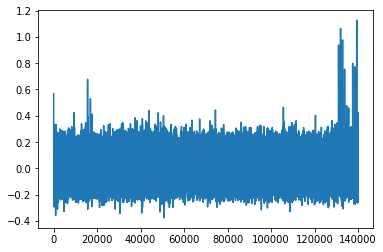

In [133]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(dff)

In [ ]:
query_string = '''
    select id
    from cell_rois
    where cell_specimen_id = {} and ophys_experiment_id = {}
'''
db.lims_query()